In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [2]:
import numpy as np
from scipy.integrate import simps

In [3]:
def masskg(L, D, rho):
    return np.pi * L * (D/2)**2 * rho * 1e-3

In [4]:
# Define the Gaussian functions
def gaussian(x, mean, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / sigma) ** 2)


In [5]:
def plot_gaussians(mean1, mean2, sigma1, sigma2, title):
    # Define the range of x values (energy in keV)
    x = np.linspace(2300, 2600, 1000)
    
    
    # Calculate the Gaussian curves
    y1 = gaussian(x, mean1, sigma1)
    y2 = gaussian(x, mean2, sigma2)
    
    # Plot the Gaussians
    plt.figure(figsize=(8, 4))
    plt.plot(x, y1, label=f'Gaussian centered at {mean1} keV', color='blue')
    plt.plot(x, y2, label=f'Gaussian centered at {mean2} keV', color='red')
    
    # Add labels and legend
    plt.xlabel('Energy (keV)')
    plt.ylabel('Normalized Intensity')
    plt.title(title)
    plt.legend()
    
    # Show the plot
    plt.grid()
    plt.show()

## LXe
- Consider a LXe TPC with L = 130 cm and D = 116 cm (e.g, similar to nEXO). It will host 4.1 tons of LXe.

In [6]:
Lnx = 125   # in cm
Dnx = 116   # in cm
rlxe = 3    # in g/cm3
Mnx = np.pi * (Dnx/2)**2 * Lnx * rlxe * 1e-3
Mnx = masskg(Lnx, Dnx, rlxe)
print(f"Mass of LXe (in kg) = {Mnx}")

Mass of LXe (in kg) = 3963.1191325035234


- Define a fiducial region as a volume, centered in the TPC o L = 86 cm and D = 71 cm. It will host ~1 ton of LXe

In [7]:
Lfd = 86 
Dfd = 71 
Mfd =  masskg(Lfd, Dfd, rlxe)
print(f"Fiducial mass of LXe (in kg) = {Mfd}")

Fiducial mass of LXe (in kg) = 1021.4715725551264


- The shielding length for gammas emitted at right angles from the end-caps is Z, and R across the radial direction
- In the longitudinal direction Z = (Lnx - Lfd)/2
- In the radial direction R = (Dnx - Dfd)/2

In [8]:
Z = (Lnx - Lfd)/2
R = (Dnx - Dfd)/2
print(f"Z = {Z}, R = {R}")

Z = 19.5, R = 22.5


Call $\Phi_0^\gamma$ the flux of $\gamma$ of 2.5 MeV (e.g., from Bi-214) produced by the detector envelop, which includes vessel, sensors, etc. Then, the flux $\Phi^\gamma$ reaching the fiducial region in the LXe TPC will be:


$$
\Phi^\gamma = \Phi_0^\gamma e^{-L/\lambda_{att}}
$$

where  in LXe: $\lambda_{att} = 8.7$ cm. Since the shielding length is ~22 cm the attenuation of the flux will be
$e^{-22/8.5} = 0.075$.



In [9]:
phiLxe = np.exp(-19.5/8.5)
print(f"Suppression of gamma flux in LXe = {phiLxe}")

Suppression of gamma flux in LXe = 0.10085033961527574


## GXe
- Consider now a GXe TPC which can hold 1 ton of GXe on it: L = 3 m, D = 2.2 m.
- The density of GXe is 89.9 kg/m3 at 15 bar (20 C). 

In [10]:
Lgx = 300 # in cm
Dgx = 220 # in cm
rgx = 89.9e-3 # in g/cm3 15 bar 
#rgx = 58e-3 # in g/cm3 10 bar
#rgx = 40e-3 # in g/cm3 7 bar

In [11]:
Mgx = masskg(Lgx, Dgx, rgx)
print(f"Mass of GXe (in kg) = {Mgx}")

Mass of GXe (in kg) = 1025.2179217945322


- Consider the attenuation of gammas going along the axis. Here the situation is inverse than LXe, we count any gamma that interacts along the 3 m of axis.

$$
1 - \Phi^\gamma = 1 - \Phi_0^\gamma e^{-L/\lambda_{att}}
$$

- In GXe: $\mu/\rho = 4.8 \times 10^{-2}$ cm$^2$/g, thus $\mu =  4.8 \times 10^{-2} \times \rho = 0.0043$
- Then 

In [12]:
muor = 0.01 * (4.07 + 3.68)/2 
print(f"mu/rho = {muor:.2g} g/cm2")
mu = muor * rgx
print(f"mu = {mu:.2g} cm")

mu/rho = 0.039 g/cm2
mu = 0.0035 cm


In [13]:
phiGxeL = np.exp(-Lgx*mu)
print(f"Fraction of gamma flux in GXe along L = {phiGxeL}")
phiGxeR = np.exp(-Dgx*mu)
print(f"Fraction of gamma flux in GXe along R = {phiGxeR}")

Fraction of gamma flux in GXe along L = 0.3516610476901523
Fraction of gamma flux in GXe along R = 0.4646840809942138


In [14]:
print(f"Fraction of gamma flux interacts in GXe along L = {1 - phiGxeL}")
phiGxeR = np.exp(-Dgx*mu)
print(f"Fraction of gamma flux interacts in GXe along R = {1 - phiGxeR}")

Fraction of gamma flux interacts in GXe along L = 0.6483389523098477
Fraction of gamma flux interacts in GXe along R = 0.5353159190057861


# LXe Energy resolution

In [15]:
sigma = 2.3 * 1.5 * np.sqrt(2615/2458)
print(f"Energy resolution LXe = {sigma} % FWHM")

Energy resolution LXe = 3.558475682975837 % FWHM


## Bi-214
- The branching ratio for the emission of this gamma ray is about 1.57%. This means that in roughly 1.57% of the decays of Bi-214, a gamma photon with an energy of 2447 keV is emitted.
- This is 10 keV away from 2457 keV (Xe-137 Qbb).

In [16]:
def overlap_2g(mean1, sigma1, mean2, sigma2):
    # Calculate the fraction of the area overlap
    y1 = gaussian(x, mean1, sigma1)
    y2 = gaussian(x, mean2, sigma2)
    
    overlap = np.minimum(y1, y2)
    area_overlap = simps(overlap, x)
    area_y1 = simps(y1, x)
    area_y2 = simps(y2, x)
    
    fraction_overlap_y1 = area_overlap / area_y1
    fraction_overlap_y2 = area_overlap / area_y2
    return fraction_overlap_y1, fraction_overlap_y2


In [17]:
mean1 = 2447
mean2 = 2457
sigma_x = 0.035  #LXe, pessimistic
sigma1 = mean1 * sigma_x
sigma2 = mean2 * sigma_x

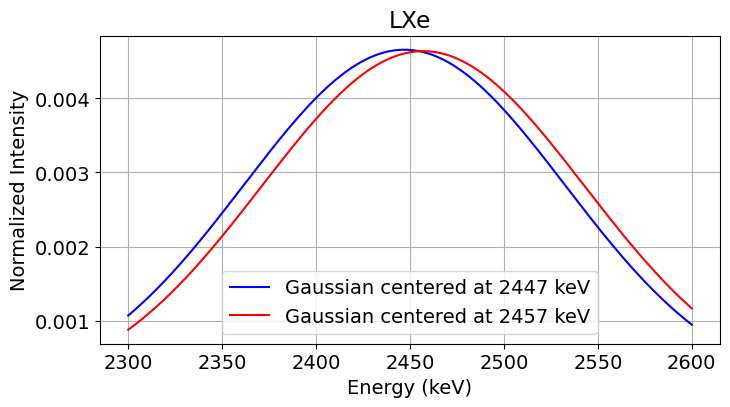

In [18]:
plot_gaussians(mean1, mean2, sigma1, sigma2, "LXe")

In [19]:
overlap_2g(mean1, sigma1, mean2, sigma2)

NameError: name 'x' is not defined

In [108]:
# GXe
mean1 = 2447
mean2 = 2457
sigma_x = 0.01  #GXe, pessimistic
sigma1 = mean1 * sigma_x
sigma2 = mean2 * sigma_x

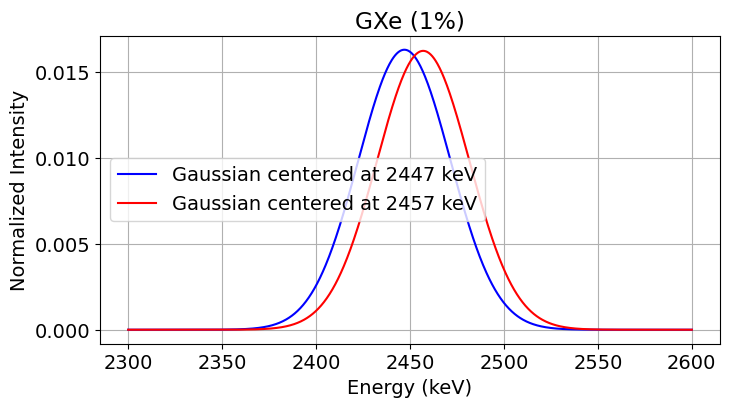

In [109]:
plot_gaussians(mean1, mean2, sigma1, sigma2, "GXe (1%)")

In [110]:
overlap_2g(mean1, sigma1, mean2, sigma2)

(0.8384110973268839, 0.8384110973268836)

In [116]:
# GXe
mean1 = 2447
mean2 = 2457
sigma_x = 0.005  #GXe, pessimistic
sigma1 = mean1 * sigma_x
sigma2 = mean2 * sigma_x

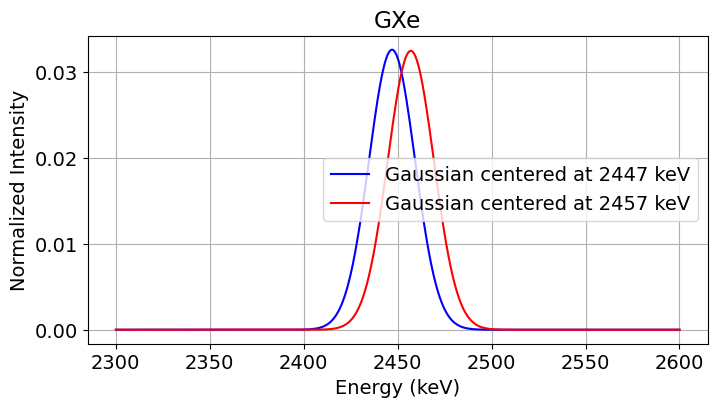

In [117]:
plot_gaussians(mean1, mean2, sigma1, sigma2, "GXe")

In [118]:
overlap_2g(mean1, sigma1, mean2, sigma2)

(0.6833679338330215, 0.6833679338330215)

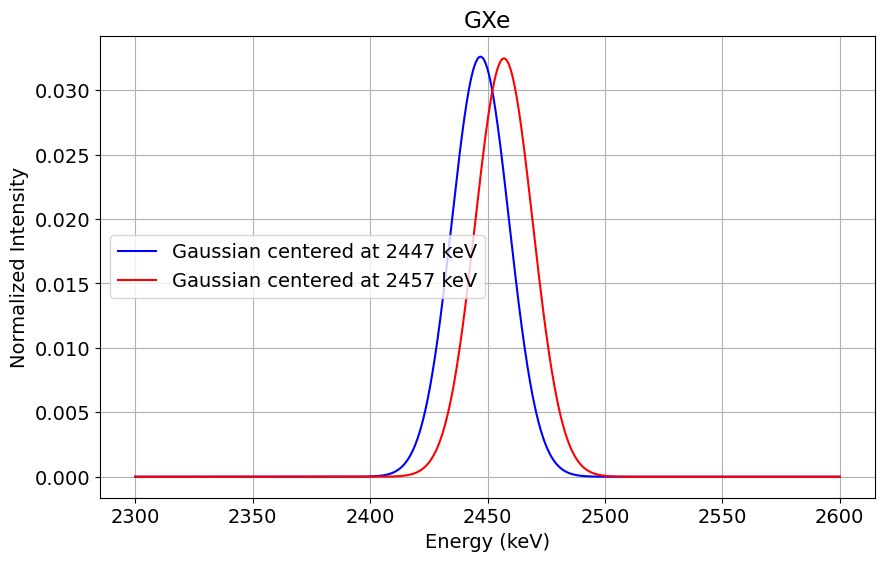

In [100]:
plot_gaussians(mean1, mean2, sigma1, sigma2, "GXe")